
# **HOTEL RESERVATIONS**


**Problem Type:** Classification (Binary)


**Problem:**


*   The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior
*   A significant number of hotel reservations are called-off due to cancellations or no-shows.
*   The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.


**Goal:**

We need to determine if each customer is likely to cancel their reservation or not.


Source: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

notbook selected: https://www.kaggle.com/code/raphaelmarconato/hotel-reservations-eda-balancing-and-ml-93-4


**Data set**
#### Here we can see that we have categorical and continuous variables.

#### Here the explanation about the variables:

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

The target variable is booking_status.


## <font color='blue'> 1. Setup. </font>
In this notebook section, we will import the libraries needed to run this code.

In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## <font color='blue'> 2. Load data. </font>


#### Here we are reading the database using the name "df" in the variable.

In [90]:
Input_Path = "../DATA/"
Input_File = "Hotel_Reservations.csv"
Input_File_Data = Input_Path + Input_File 
df = pd.read_csv(Input_File_Data)

In [91]:
df = df.drop('Booking_ID', axis = 1)

#### Here we will remove the Booking_ID variable that will not be used

## <font color='blue'> 3. Data exploration. </font>

In [92]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [94]:
(df.isnull().sum()/len(df))

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [95]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [97]:
df.type_of_meal_plan.value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [98]:
df.room_type_reserved.value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [99]:
df.market_segment_type.value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [100]:
df.booking_status.value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

## <font color='blue'> 5. Data analysis. </font>

#### Categorical Variables

#### Looking at our categorical variables, we can see that most reservations are made for rooms with two adults, without children, generally reservations are short-term, not many cases are long-term, most reservations select meal_plan_1, no need a car space, the most booked room types are types 1 and 4 and most of our data is 2018 bookings.

<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

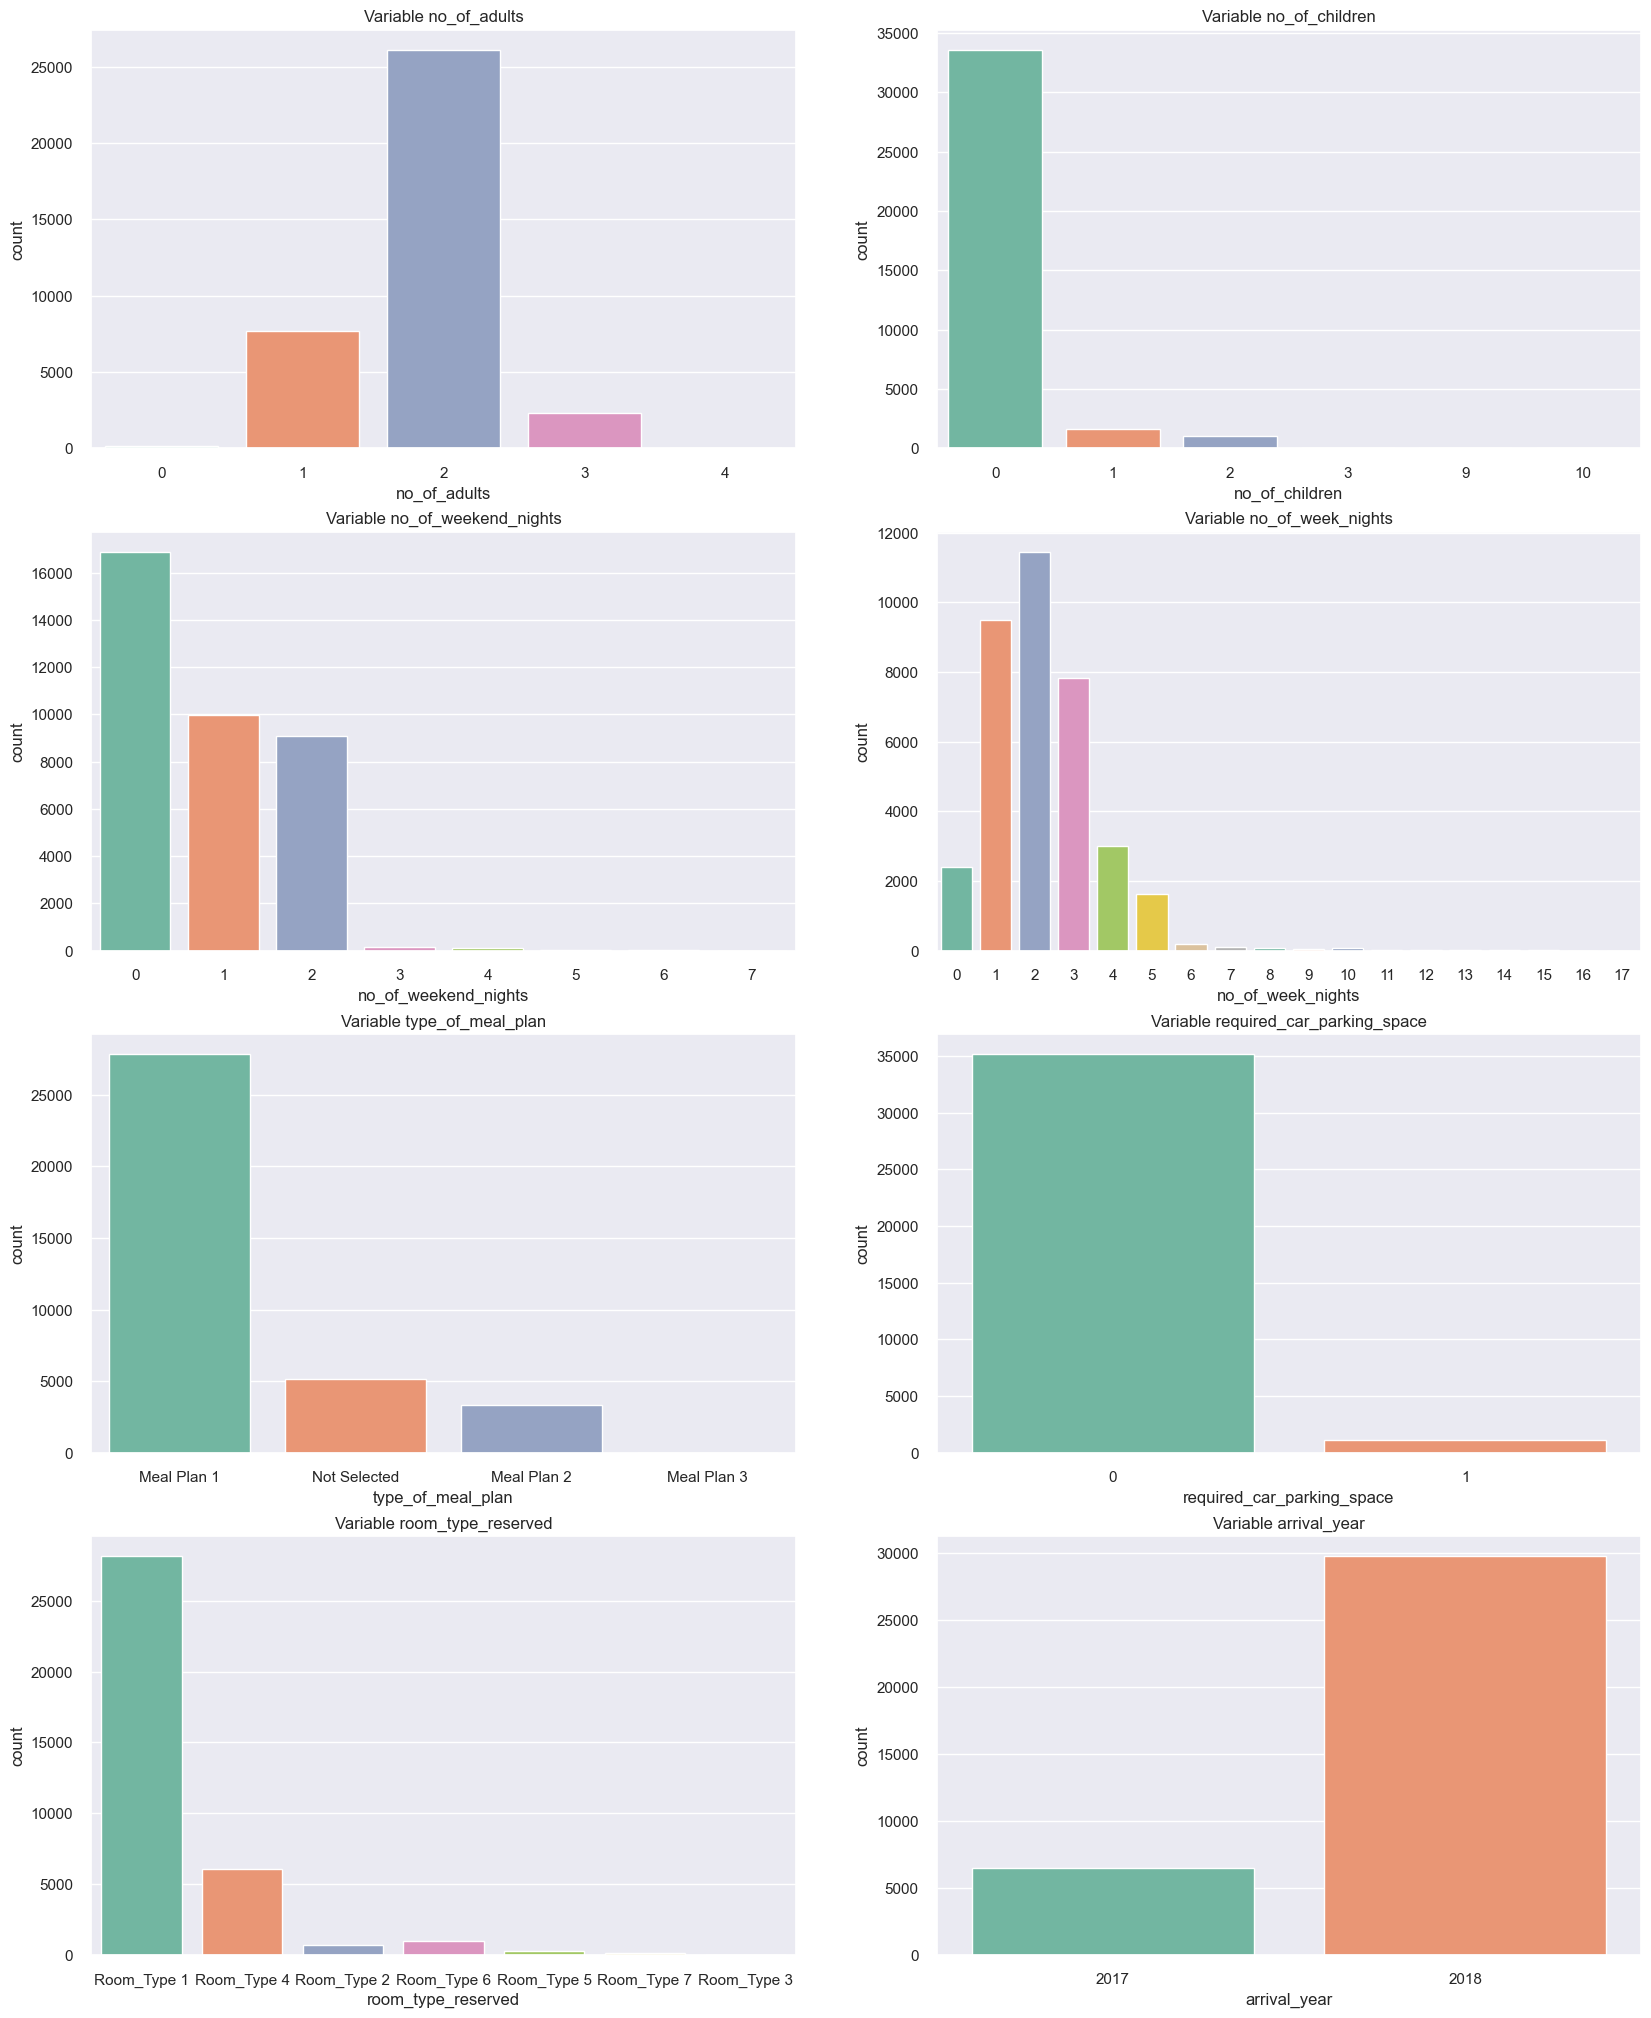

In [101]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

#### When we look at the bookings by month, we can see that there is an increase, from January to October the number of bookings gradually grows and it drops again in the months of November and December, most bookings are made online, most of the guests are guests who they have never been to the hotel and are usually guests who have never canceled, the greater the number of special requests, the less data we have. When we look at our target variable, we can see that we have approximately 65% ​​of reservations that have not been cancelled.

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

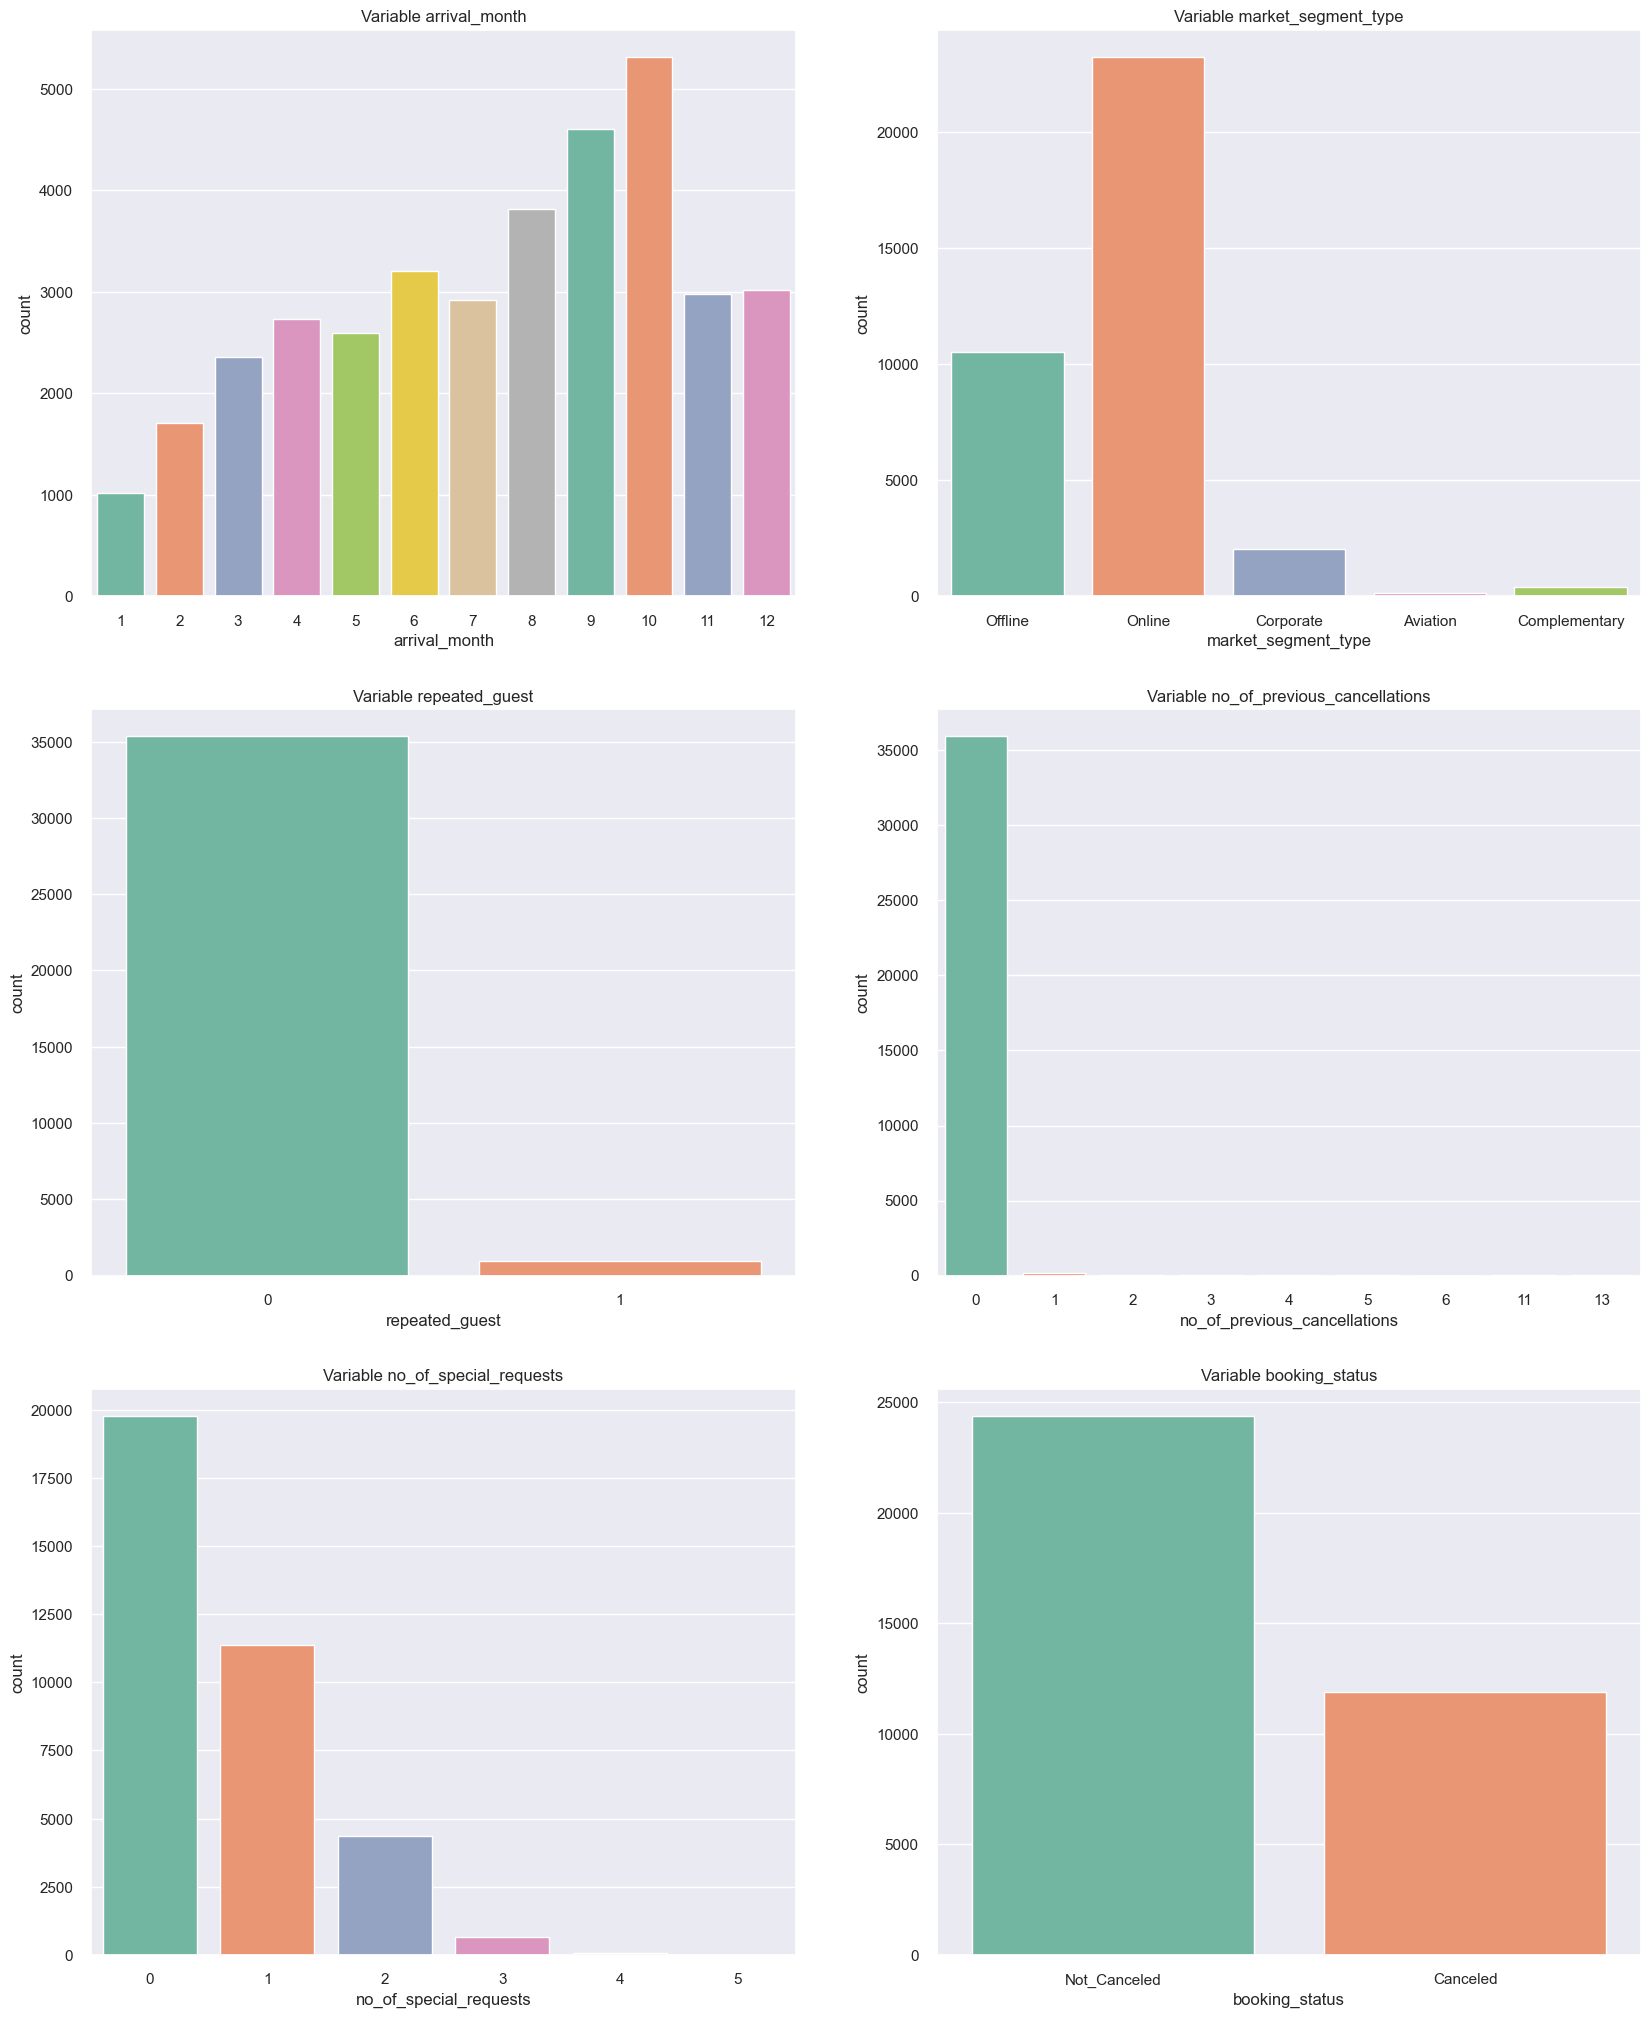

In [102]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

#### Continous Variables

#### Looking at our continuous variables we can see that generally reservations are made without taking too long, the longer it takes, the smaller the number of reservations, we can see that the top of our data is usually at 100 euros the average price of the room and that the guests usually never canceled a booking before.

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

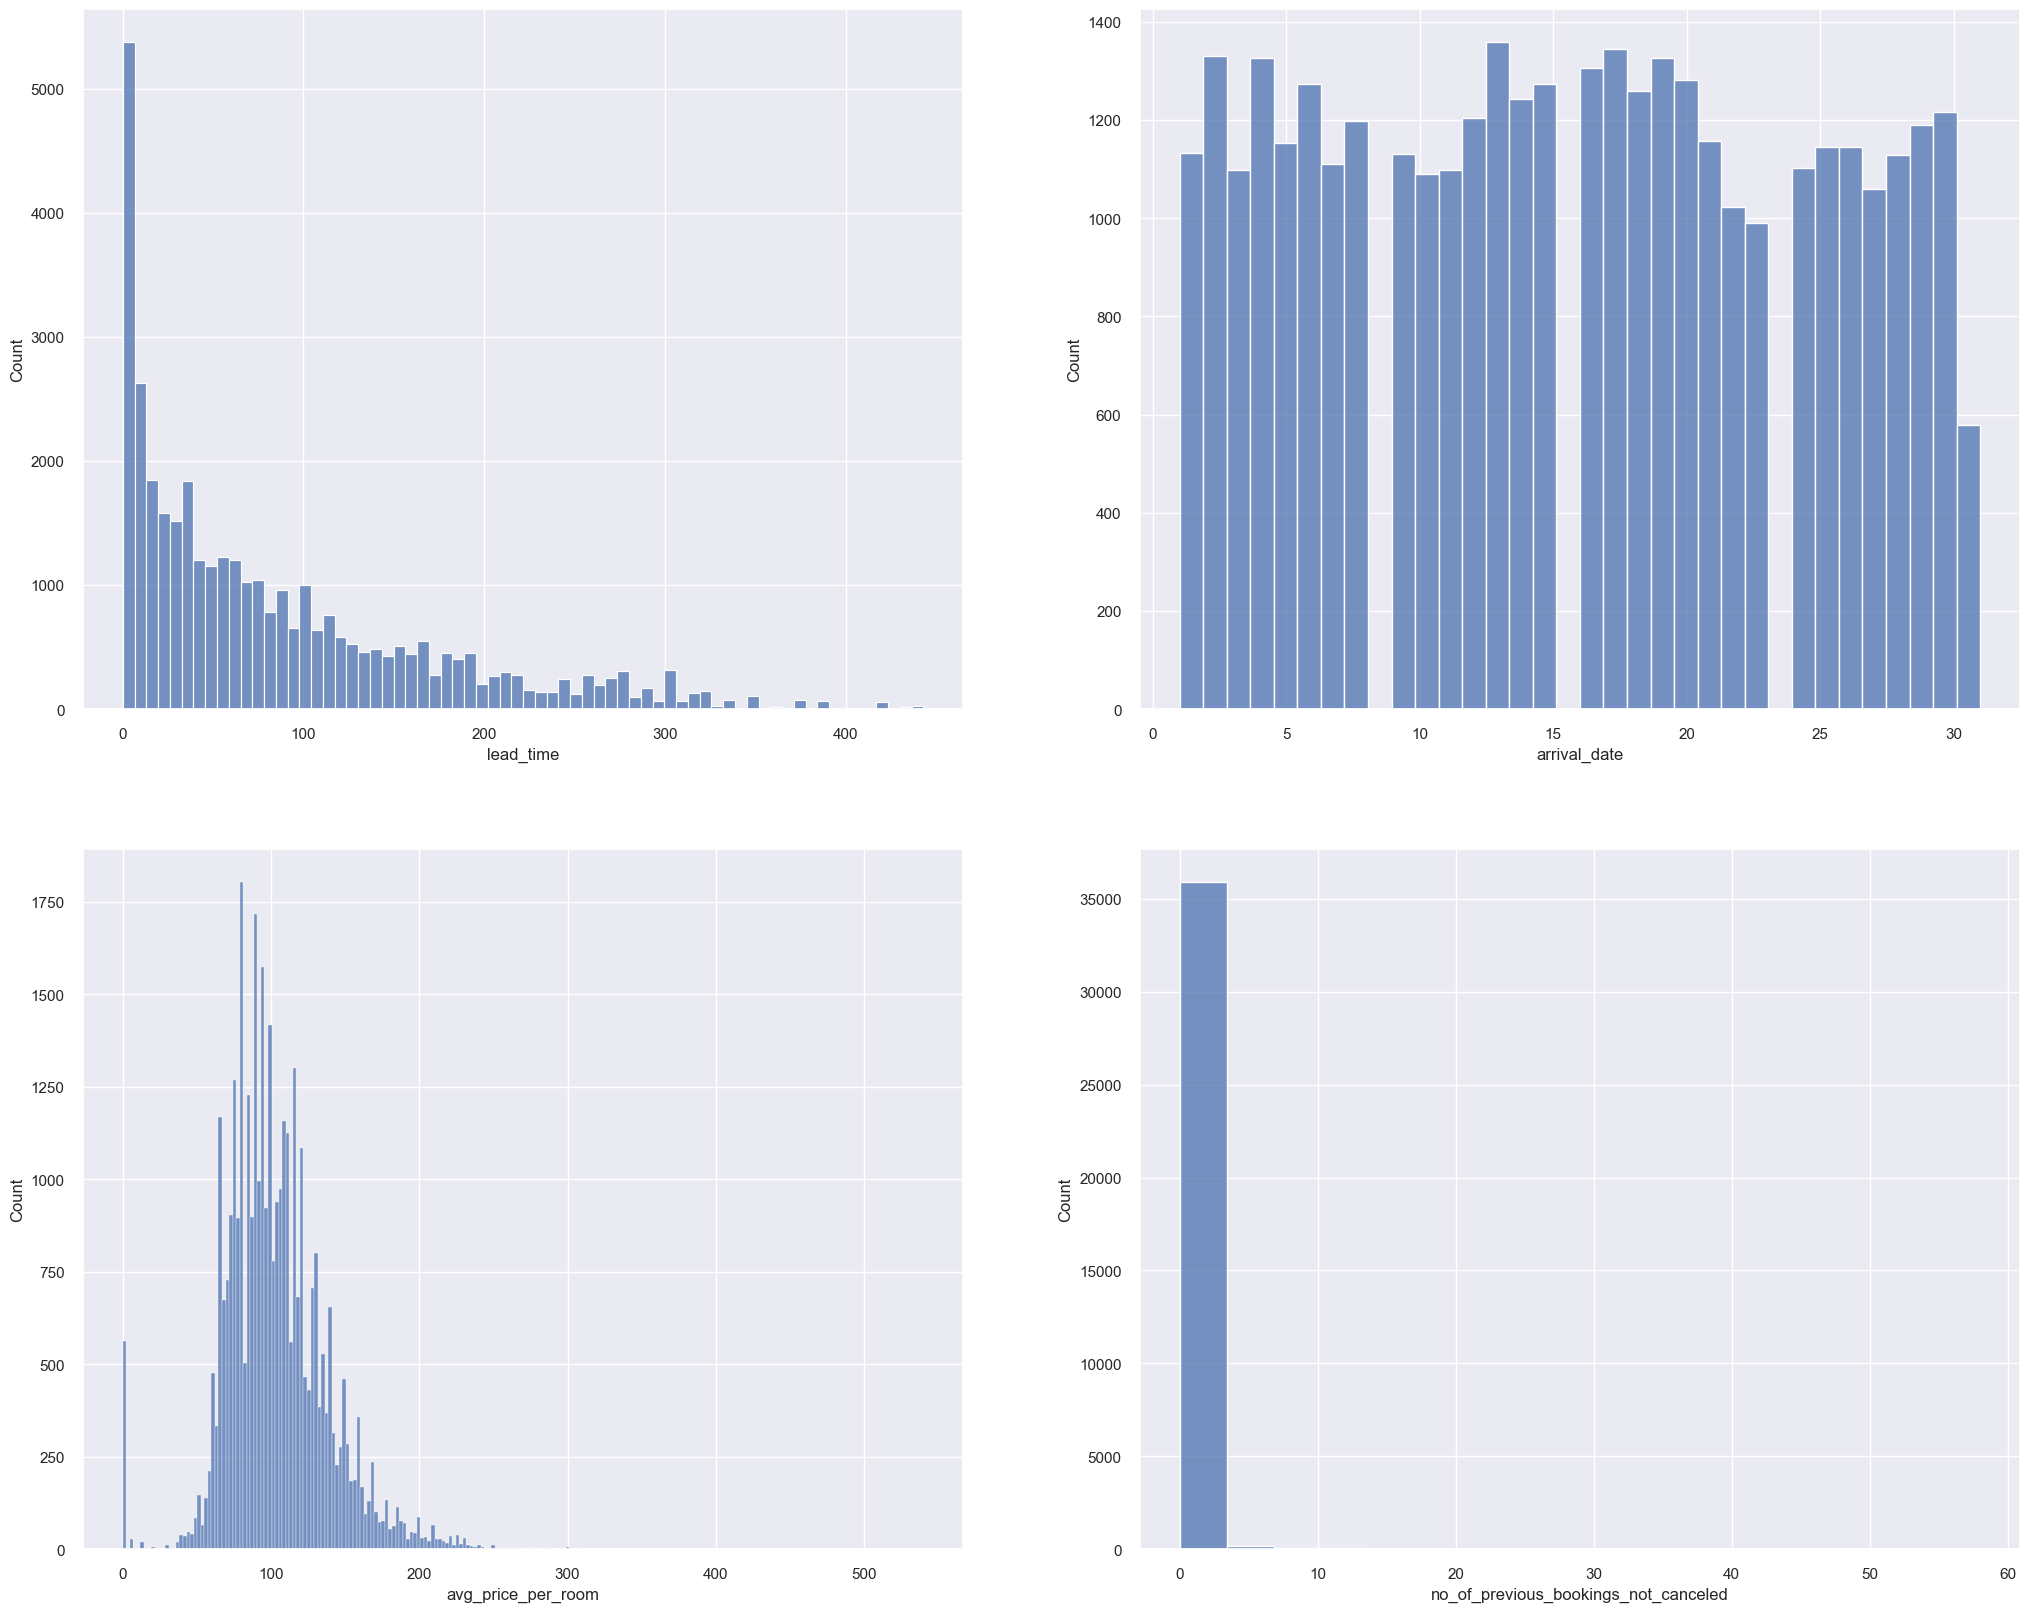

In [103]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

#### Verifying the correlation between our variables.

- We can see that we don't have strong correlation between the variables.

<Axes: >

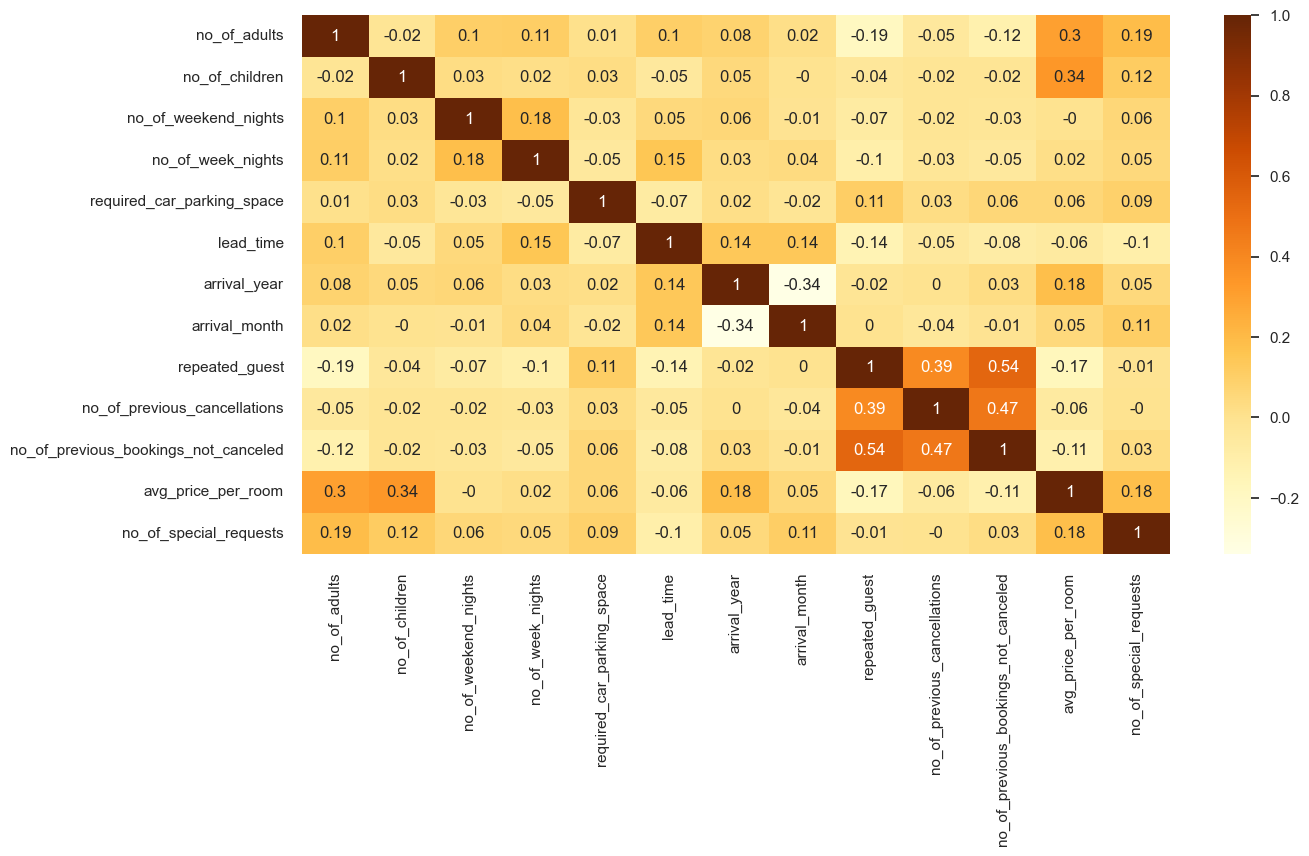

In [104]:
df_varnum = df[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]# select numeric variables
correlation = df_varnum.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

## <font color='blue'> 4. Data transformation. </font>

In [105]:
df['booking_status'] = df['booking_status'].map({'Canceled':0, 'Not_Canceled':1})

#### Label Encoder

#### Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [108]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()


df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])


In [111]:
df.head(100)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,0,2,0,1,0,134,2018,8,4,4,0,0,0,130.50,2,1
96,2,0,0,2,1,0,0,320,2018,8,18,4,0,0,0,115.00,1,0
97,2,0,0,4,0,0,0,118,2018,4,13,4,0,0,0,90.95,1,1
98,2,0,0,3,0,0,0,30,2018,11,17,4,0,0,0,76.08,1,1


#### Separating into features variables and target variable.

In [112]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

#### StandardScaler

#### Here we will use StandardScaler to put our data in the same scale.

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

## <font color='blue'> 6. Model Building. </font>


#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### K-Neighbors Model.
#### Here we will use the K-Neighbors Classifier Model

In [115]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier()
KNeighbors.fit(X_train, y_train)
previsoes_KN = KNeighbors.predict(X_test)

#### Result

0.8030873839933842

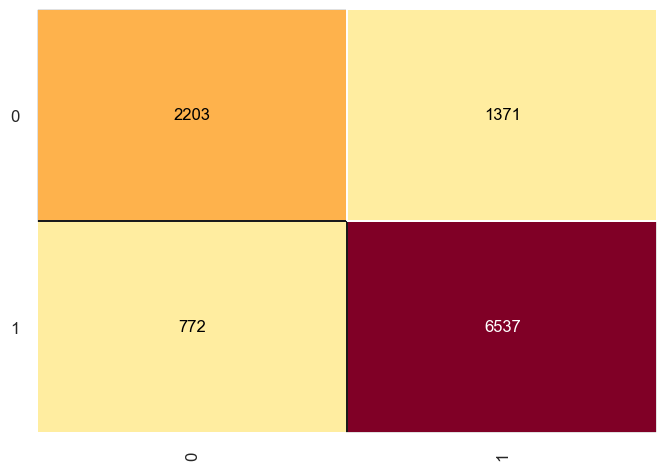

In [116]:
cm = ConfusionMatrix(KNeighbors)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [117]:
classification_kneighbors = (classification_report(y_test, previsoes_KN))
print(classification_kneighbors)

              precision    recall  f1-score   support

           0       0.74      0.62      0.67      3574
           1       0.83      0.89      0.86      7309

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883



In [118]:
score_kneighbors = 0.8030873839933842

#### We had 80.3% accuracy, It's a good model. We'll look for a better model.